In [1]:
!pip install pandas scikit-learn sentence-transformers matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 클러스터링 4개로 시도
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기
df = pd.read_csv("/content/drive/MyDrive/문화data/Ontology_positive_reviews8.csv")

# 2. 문장 임베딩 (BGE-M3 또는 KR-SBERT 등)
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")  # Colab에선 이 모델 추천
embeddings = model.encode(df["review"].tolist(), show_progress_bar=True)

# 3. 클러스터링 (KMeans, 클러스터 수는 임의로 지정)
n_clusters = 4  # 필요에 따라 조정
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings)

# 4. 클러스터별 대표 리뷰 추출 (클러스터 중심과 가장 가까운 리뷰)
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)

print("\n📌 클러스터별 대표 리뷰 예시:")
for cluster_num in range(n_clusters):
    idx = closest[cluster_num]
    print(f"\n[Cluster {cluster_num}]")
    print(f"- Drama: {df.iloc[idx]['drama']}")
    print(f"- Review: {df.iloc[idx]['review']}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/24 [00:00<?, ?it/s]


📌 클러스터별 대표 리뷰 예시:

[Cluster 0]
- Drama: 쇼핑왕 루이
- Review: 나름 케미 좋네 생각보다 더 좋네 덧. 리트리버가 생각난닼ㅋㅋ 누군지는 보면 알듯

[Cluster 1]
- Drama: 추리의 여왕
- Review: 전편처럼 재미졌으 ㅎ

[Cluster 2]
- Drama: 땐뽀걸즈
- Review: 무엇이든 과정과 결실, 그 안에서의 관계가 주는 기쁨은 참 좋다. 노력할수록 더더욱. 그걸 느껴본 지가 참 오래된 것 같다. / 친숙한 풍경 속 몰랐던 이야기 / 학생들의 에너지가 대단하다 ㅎㅎ - CGV 통영 1520 6E5

[Cluster 3]
- Drama: 옥탑방 왕세자
- Review: 유치뽕짝하지만 너무 신선했던 좋은 드라마


In [4]:
import numpy as np
print("\n📌 클러스터별 전체 리뷰 예시:")

for cluster_num in range(n_clusters):
    print(f"\n[Cluster {cluster_num}]")
    cluster_indices = np.where(kmeans.labels_ == cluster_num)[0]  # 해당 클러스터에 속한 인덱스
    for idx in cluster_indices:
        print(f"- Drama: {df.iloc[idx]['drama']}")
        print(f"- Review: {df.iloc[idx]['review']}")
    print(f"▶ 총 리뷰 수: {len(cluster_indices)}개\n")


📌 클러스터별 전체 리뷰 예시:

[Cluster 0]
- Drama: (아는 건 별로 없지만) 가족입니다
- Review: 가족은 같이 살아온 세월이다.
- Drama: 가면
- Review: 메이 보려고 봣어요
- Drama: 거침없이 하이킥
- Review: 나한테는 이게 전원일기라고
- Drama: 겨울연가
- Review: 맞는색깔을 입었을때
- Drama: 경우의 수
- Review: 돌고 돌고 또 돌고.
- Drama: 경우의 수
- Review: 확률이 낮아
- Drama: 계룡선녀전
- Review: 옳지 착하다
- Drama: 계룡선녀전
- Review: 뭉글뭉글해
- Drama: 공작도시
- Review: 마인이랑 비슷한 느낌
- Drama: 구미호뎐
- Review: 그래, 내겐 한국 설화가 필요했어!
- Drama: 구미호뎐
- Review: ♥︎
- Drama: 구미호뎐
- Review: 보게된다..
- Drama: 군검사 도베르만
- Review: 무법변호사 작가래서 많은 게 납득 됨
- Drama: 군검사 도베르만
- Review: 작가가 뭐 어떻길래 하고 봤더니 아 그렇구나 싶다.
- Drama: 굿캐스팅
- Review: 아씨 깜짝이야. 괜히봤다.
- Drama: 궁
- Review: ost는 지금 들어도 설렌다.
- Drama: 궁
- Review: 나라꼴잘돌아간다
- Drama: 그냥 사랑하는 사이
- Review: 과거의 손아귀에서 벗어나 성큼성큼.
- Drama: 나 홀로 그대
- Review: "만나고있잖아  밖에서~ 사람."
- Drama: 나를 사랑한 스파이
- Review: 잘 섞인 칵테일. An apt mix of action, absurdity, and affection.
- Drama: 나빌레라
- Review: ◆ 할아버지의 몸을 느끼며
- Drama: 나의 나라
- Review: 죽지도 않고 또오는..
- Drama: 나의 나라
- Review: 그래봤자 우렁이지.
- Drama: 나의 해방일지
- Re

Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


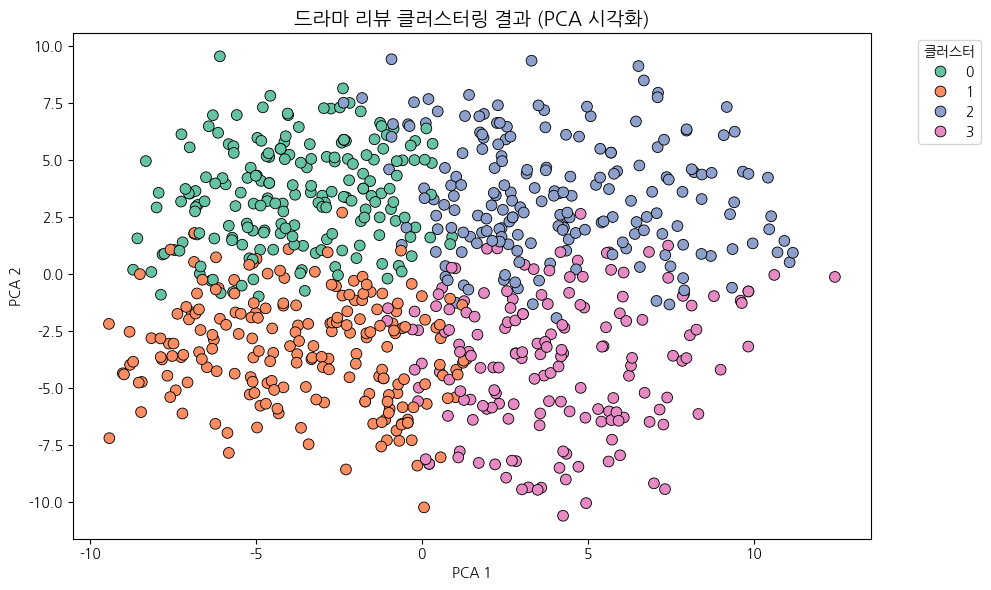

In [5]:
# 📌 1. 한글 폰트 설치 및 등록
!apt-get -qq install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os

# 📌 2. 나눔고딕 폰트 경로 등록
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

# 📌 3. PCA 차원 축소 및 시각화
from sklearn.decomposition import PCA

# 5. 차원 축소 (PCA 사용)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df["pca_x"] = reduced_embeddings[:, 0]
df["pca_y"] = reduced_embeddings[:, 1]

# 6. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="pca_x", y="pca_y",
    hue="cluster",
    data=df,
    palette="Set2",
    s=60, edgecolor="black"
)
plt.title("드라마 리뷰 클러스터링 결과 (PCA 시각화)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="클러스터", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 워드 클라우드

In [6]:
# 📌 1. 설치 (코랩에서만 필요)
!pip install konlpy wordcloud
!apt-get -qq install -y fonts-nanum

# 📌 2. 라이브러리 임포트
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import os

# 📌 3. 한글 폰트 설정
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 19.8 MB/s eta 0:00:00


In [7]:
# 📌 4. 전처리 함수: 명사 추출 + 불용어 제거 + 한 글자 제거
okt = Okt()

stopwords = {
    "드라마", "사람", "그냥", "생각", "다시", "이야기", "나라", "바보",
    "지금", "이제", "과거", "뭔가", "무슨", "뭐", "그", "로써", "이마이",
    "또", "정도", "이렇게", "그리고", "정말", "진짜", "배우", "영화", "작가","시작",
    "전개", "내용", "과정", "속도", "주제", "상황", "보다", "보는", "봤다", "이런",
    "그", "그때", "이건", "그런", "시작", "설계", "전환"
}

def preprocess(text):
    tokens = okt.nouns(text)              # 명사만 추출
    tokens = [t for t in tokens if len(t) > 1 and t not in stopwords]  # 한 글자 제거 + 불용어 제거
    return tokens

In [8]:
# 📌 5. 클러스터별 워드클라우드 생성 함수
def make_wordcloud_by_cluster(df, cluster_num, font_path):
    # 해당 클러스터 리뷰 추출
    texts = df[df['cluster'] == cluster_num]['review'].dropna().tolist()

    # 모든 텍스트 병합 및 토큰화
    all_tokens = []
    for text in texts:
        all_tokens.extend(preprocess(text))

    # 단어 빈도 계산
    counter = Counter(all_tokens)

    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400,
        max_words=100
    ).generate_from_frequencies(counter)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'클러스터 {cluster_num} 워드클라우드', fontsize=16)
    plt.show()


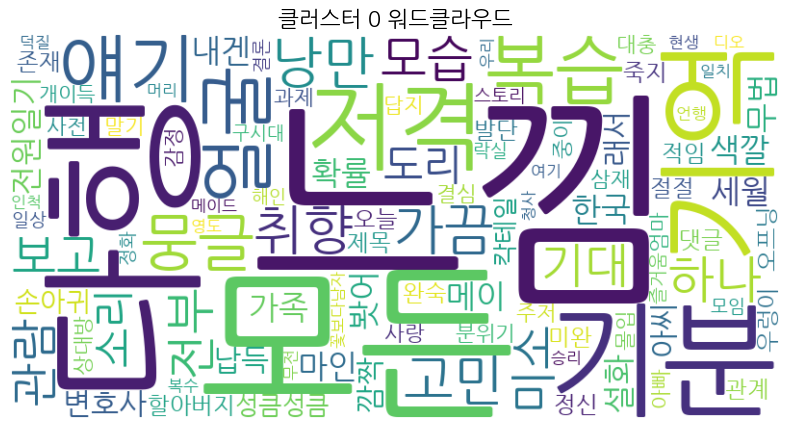

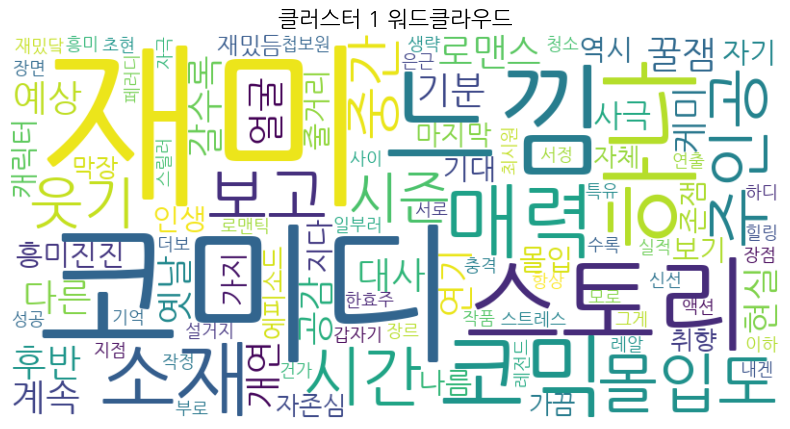

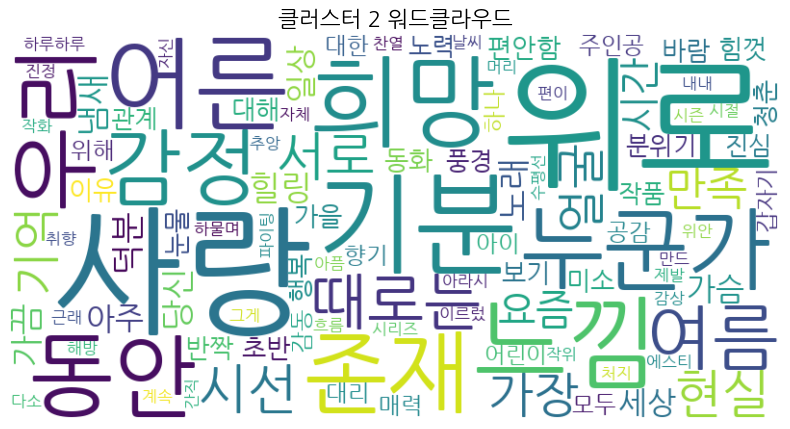

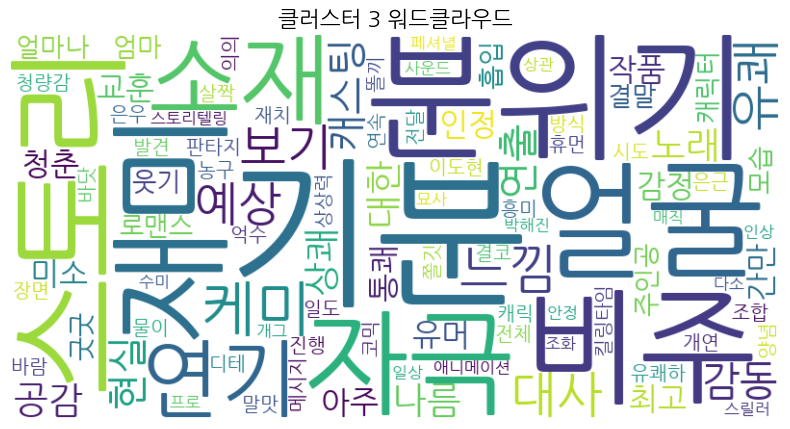

In [9]:
# 📌 6. 전체 클러스터 반복 실행
for cluster_num in sorted(df['cluster'].unique()):
    make_wordcloud_by_cluster(df, cluster_num, font_path)

*   클러스터0 : 감성적 공감과 일상의 여운을 담은 드라마
*   클러스터1 : 재미와 스토리의 몰입감을 즐기는 드라마
*   클러스터2 : 마음이 힘들 때, 위로와 희망을 주는 드라마
*   클러스터3 : 분위기와 감정에 푹 빠져드는 드라마



